# Supervised Machine Learning Examples
Some examples of supervised machine learning examples in Python.
First, load up a ton of modules...

In [72]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix
from sklearn import metrics
pd.options.mode.chained_assignment = None

##  Load the data
Next, we have to load the data into a dataframe.  In order to have a balanced dataset, we will use 10000 records from Alexa which will represent the not malicious domains, and 10000 records from `gameoverdga` representing the malicious domains.  

You can see that at the end we have 10000 of each.

In [73]:
df = pd.read_csv( '../../data/dga-full.csv' )
#Filter to alexo and game over
df = df[df['dsrc'].isin(['alexa','gameoverdga'])]
df.dsrc.value_counts()

alexa          10000
gameoverdga    10000
Name: dsrc, dtype: int64

## Add a Target Column
For our datasets, we need a numeric column to represent the classes.  In our case we are going to call the column `isMalicious` and assign it a value of `0` if it is not malicious and `1` if it is.

In [74]:
df['isMalicious'] = df['dsrc'].apply( lambda x: 0 if x == "alexa" else 1 )

In [75]:
df['isMalicious'].value_counts()

1    10000
0    10000
Name: isMalicious, dtype: int64

## Perform the Train/Test Split
For this, let’s create a rather small training data se as it will reduce the time to train up a model.
Feel free to try a 15%, 20% or even a 30% portion for the training data (lower percentages for slower machines).

In this example, we will split 30% for train and 70% for test.

Normally you would want most of the data in the training data, but more training data can considerably extend the time neede to train up a model.

We're also going to need a list of column names for the feature columns as well as the target column. 

In [76]:
#train, test = train_test_split(df, test_size = 0.7)
features = ['length', 'dicts', 'entropy','numbers', 'ngram']
target = 'isMalicious'

feature_matrix = df[ features ]
target_vector = df[ target ]
feature_matrix_train, feature_matrix_test, target_train, target_test = train_test_split(feature_matrix, target_vector, test_size=0.25, random_state=33)

In [77]:
feature_matrix.sample(10)

,length,dicts,entropy,numbers,ngram
14062,25,0.360000,3.973661,5,0.602060
51348,9,1.000000,2.725481,0,11.519587
12902,25,0.240000,3.973661,6,2.130334
46705,6,0.000000,2.251629,0,0.000000
18853,26,0.192308,3.796218,8,0.000000
21782,27,0.259259,3.856196,11,1.041393
45587,11,1.000000,3.095795,0,14.640100
47856,9,1.000000,2.725481,0,13.101406
15532,25,0.000000,4.243856,9,0.477121
14709,26,0.115385,4.132944,5,2.570543


## Create the Classifiers
The next step is to create the classifiers. What you'll see is that scikit-learn maintains a constant interface for every machine learning algorithm.  For a supervised model, the steps are:
1.  Create the classifier object
2.  Call the `.fit()` method with the training data set and the target 
3.  To make a prediction, call the `.predict()` method

In [98]:
#Create the Random Forest Classifier
random_forest_clf = RandomForestClassifier(n_estimators=10, 
                             max_depth=None, 
                             min_samples_split=2, 
                             random_state=0)

random_forest_clf.fit( feature_matrix_train, target_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [99]:
#Next, create the SVM classifier
svm_classifier = svm.SVC()
svm_classifier.fit(feature_matrix_train, target_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Comparing the Classifiers
Now that we have two different classifiers, let's compare them and see how they perform. Fortunately, Scikit has a series of functions to generate metrics for you.  The first is the cross validation score.

In [100]:
scores = cross_val_score(random_forest_clf, feature_matrix_train, target_train)
scores.mean()

0.99993333333333334

In [105]:
scores = cross_val_score(svm_classifier, feature_matrix_train, target_train)
scores.mean()

1.0

We'll need to to get the predictions from both classifiers, so we add columns to the test and training sets for the predictions.

In [106]:
predictions_test = random_forest_clf.predict( feature_matrix_test )
predictions_train = random_forest_clf.predict( feature_matrix_train )
svm_predictions_test = svm_classifier.predict( feature_matrix_test)
svm_predictions_train = svm_classifier.predict( feature_matrix_train)

## Confusion Matrix
These are a little confusing (yuk yuk), but are a very valuable tool in evaluating your models.  Scikit-learn has a function to generate a confusion matrix as shown below.  
``` python
confusion_matrix( target_test, predictions_test)
```
Try this yourself to see what the confusion matrices look like for various models.

In [107]:
confusion_matrix( target_test, predictions_test)

array([[2473,    0],
       [   0, 2527]])

Next, try using YellowBrick to produce nicer, color coded confusion matrices.  Remember the syntax is:

```python
viz = ConfusionMatrix(RandomForestClassifier(), classes=[0,1])

viz.fit(feature_matrix_train, target_train)  
random_forest_visualizer.score(feature_matrix_test, target_test)  
g = viz.poof()    
```

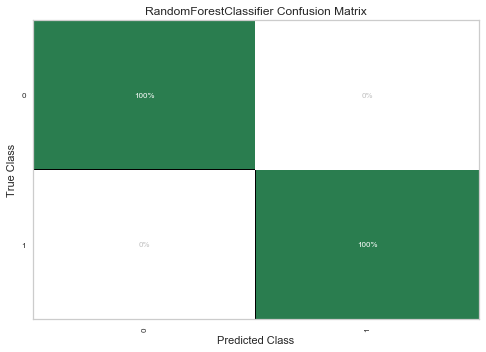

In [108]:
random_forest_visualizer = ConfusionMatrix(RandomForestClassifier(), classes=[0,1])

random_forest_visualizer.fit(feature_matrix_train, target_train)  
random_forest_visualizer.score(feature_matrix_test, target_test)  
g = random_forest_visualizer.poof()            

And again for the SVM classifier.

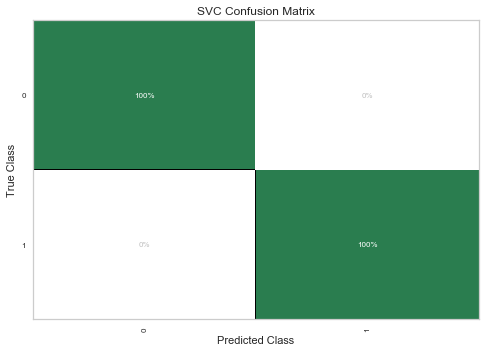

In [109]:
svm_visualizer = ConfusionMatrix(svm.SVC(), classes=[0,1])

svm_visualizer.fit(feature_matrix_train, target_train)  
svm_visualizer.score(feature_matrix_test, target_test)  
g = svm_visualizer.poof()            

### Calculate precision and recall for both models
Next, you are going to want to compare the models performance metrics.  While scikit-learn does provide all the scores as part of the metrics package, it is easier to calculate all the metrics at once using the classification report functionality.  The basic syntax is:

```python
classification_report(y_true, y_pred, target_names=target_names))
```
YellowBrick also has a nice classification report visualizer.  The basic syntax is below:
```python
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()         
```

Do this for both models.

In [110]:
print( classification_report(target_test, predictions_test, target_names=['legit', 'DGA']))

             precision    recall  f1-score   support

      legit       1.00      1.00      1.00      2473
        DGA       1.00      1.00      1.00      2527

avg / total       1.00      1.00      1.00      5000



In [111]:
print( classification_report(target_test, svm_predictions_test, target_names=['legit', 'DGA']))

             precision    recall  f1-score   support

      legit       1.00      1.00      1.00      2473
        DGA       1.00      1.00      1.00      2527

avg / total       1.00      1.00      1.00      5000



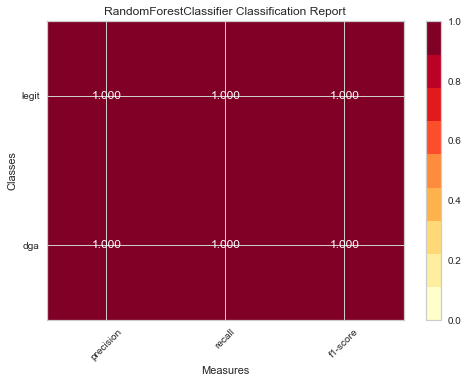

In [112]:
rf_clf_visualizer = ClassificationReport(RandomForestClassifier(), classes=['legit','dga'])

rf_clf_visualizer.fit(feature_matrix_train, target_train)  # Fit the training data to the visualizer
rf_clf_visualizer.score(feature_matrix_test, target_test)  # Evaluate the model on the test data
g = rf_clf_visualizer.poof()         

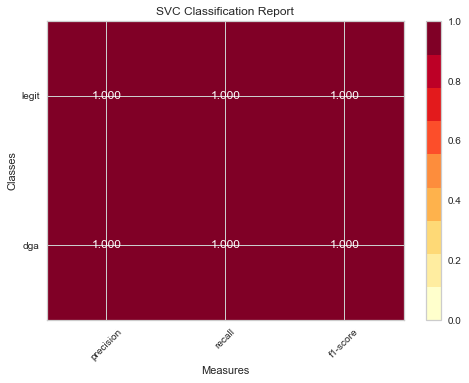

In [113]:
svm_clf_visualizer = ClassificationReport(svm.SVC(), classes=['legit','dga'])

svm_clf_visualizer.fit(feature_matrix_train, target_train)  # Fit the training data to the visualizer
svm_clf_visualizer.score(feature_matrix_test, target_test)  # Evaluate the model on the test data
g = svm_clf_visualizer.poof()      

## Feature Importance
Random Forest has a feature which can calculate the importance for each feature it uses in building the forest.  This can be calculated with  this property:`random_forest_clf.feature_importances_`.

In [90]:
importances = random_forest_clf.feature_importances_

In [91]:
importances

array([ 0.30178432,  0.08837252,  0.41345399,  0.19498576,  0.0014034 ])

You can also visualize this with the following code from: #From: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Feature ranking:
1. feature 2 (0.413454)
2. feature 0 (0.301784)
3. feature 3 (0.194986)
4. feature 1 (0.088373)
5. feature 4 (0.001403)


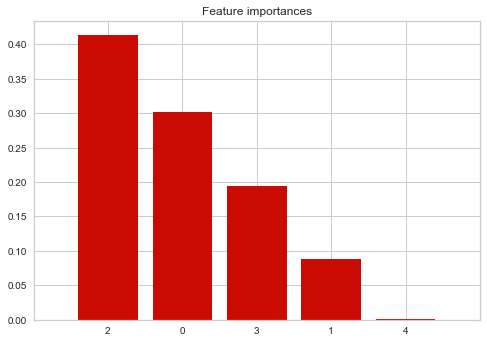

In [92]:
std = np.std([random_forest_clf.feature_importances_ for tree in random_forest_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(feature_matrix_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(feature_matrix_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(feature_matrix_test.shape[1]), indices)
plt.xlim([-1, feature_matrix_test.shape[1]])
plt.show()

You can calculate the accuracy with the `metrics.accuracy()` method, and finally, there is the `metrics.classification-report()` which will calculate all the metrics except accuracy at once.

In [93]:
pscore = metrics.accuracy_score(target_test, predictions_test)
pscore_train = metrics.accuracy_score(target_train, predictions_train)

In [94]:
print( metrics.classification_report(target_test, predictions_test, target_names=['Malicious', 'Not Malicious'] ) )

               precision    recall  f1-score   support

    Malicious       1.00      1.00      1.00      2473
Not Malicious       1.00      1.00      1.00      2527

  avg / total       1.00      1.00      1.00      5000



In [95]:
svm_pscore = metrics.accuracy_score(target_test, svm_predictions_test)
svm_pscore_train = metrics.accuracy_score(target_train, svm_predictions_train)
print( metrics.classification_report(target_test, svm_predictions_test, target_names=['Malicious', 'Not Malicious'] ) )

               precision    recall  f1-score   support

    Malicious       1.00      1.00      1.00      2473
Not Malicious       1.00      1.00      1.00      2527

  avg / total       1.00      1.00      1.00      5000



In [96]:
print( svm_pscore, svm_pscore_train)

1.0 1.0


In [97]:
print( pscore, pscore_train)

1.0 1.0
